In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Mínimos con regularización

Garantizando que la matríz $\tilde\phi^T.\tilde\phi$ tenga inversa, se procura incluir un parámetro alpha de valor muy pequeño $0<\alpha<1$ de tal forma que los autovalores de esta matriz no sean cero. Por tanto:

$$\theta_{WLS} = \tilde{\phi^+}.\tilde{y_N}$$

Se reescribe así:

$$\theta_{WLS} = (\tilde{\phi^T}.\tilde{\phi}+\alpha.I)^-1.\tilde{\phi}^T.y_N$$


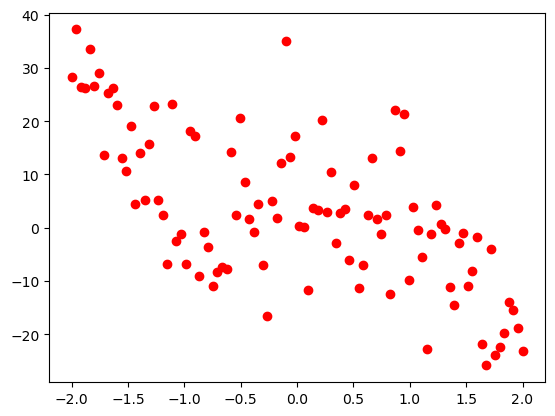

In [29]:
## Generando los valores medidos a partir 
## de un valor ideal contaminado por ruido
t = np.linspace([-2],[2],100)

pol = [-5,0.5,3,1]
y = np.polyval(pol,t) 

r = 10
yn = y + np.random.normal(0,r,t.shape)
plt.scatter(t,yn,color = 'red')

In [43]:
## Definiendo el orden deseado si es un modelo polinomial
orden = 3
phi = (t**0)
#Creación del vector phi
for n in range(1,orden+1):
    phi = np.concatenate((t**n, phi), axis=1)

phi = np.concatenate((t**0, phi),axis=1)
phi

array([[ 1.00000000e+00, -8.00000000e+00,  4.00000000e+00,
        -2.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00, -7.52488047e+00,  3.84001632e+00,
        -1.95959596e+00,  1.00000000e+00],
       [ 1.00000000e+00, -7.06895503e+00,  3.68329762e+00,
        -1.91919192e+00,  1.00000000e+00],
       [ 1.00000000e+00, -6.63182792e+00,  3.52984389e+00,
        -1.87878788e+00,  1.00000000e+00],
       [ 1.00000000e+00, -6.21310338e+00,  3.37965514e+00,
        -1.83838384e+00,  1.00000000e+00],
       [ 1.00000000e+00, -5.81238567e+00,  3.23273135e+00,
        -1.79797980e+00,  1.00000000e+00],
       [ 1.00000000e+00, -5.42927902e+00,  3.08907254e+00,
        -1.75757576e+00,  1.00000000e+00],
       [ 1.00000000e+00, -5.06338768e+00,  2.94867871e+00,
        -1.71717172e+00,  1.00000000e+00],
       [ 1.00000000e+00, -4.71431590e+00,  2.81154984e+00,
        -1.67676768e+00,  1.00000000e+00],
       [ 1.00000000e+00, -4.38166792e+00,  2.67768595e+00,
        -1.63636364e+00

In [51]:
#Valor de regularización
alpha = 0.01        
A = np.dot(phi.T,phi)+alpha*np.eye(orden+2)
p_estimado = np.dot(np.linalg.inv(A),np.dot(phi.T,yn))
y_estimado = np.polyval(p_estimado,t)

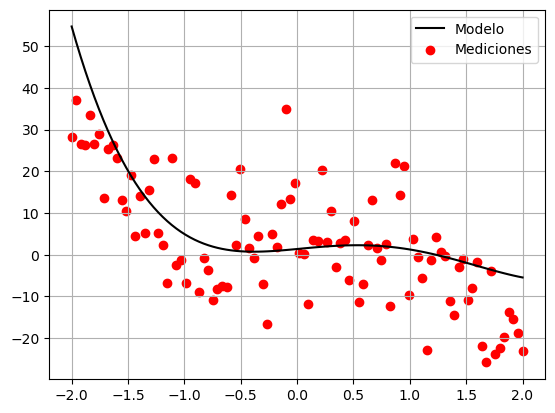

In [52]:
plt.plot(t,y_estimado,color = 'black')
plt.scatter(t,yn,color = 'red')
plt.legend(['Modelo','Mediciones'])
plt.grid()

In [53]:
## Ecuación estimada 
cad = '';
for n in range(0,orden+1):
    cad = cad+str(p_estimado[n])+'t^'+str(orden-n)+'+'

ECM = np.sqrt(np.dot((yn-y_estimado).T , (yn-y_estimado))/len(t))
cad, ECM

('[1.35963777]t^3+[-4.39770962]t^2+[0.37850685]t^1+[2.54596809]t^0+',
 array([[11.51197488]]))